<a href="https://colab.research.google.com/github/nil-pc/Pattern-Recognition---Assignment/blob/master/SVM_LG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import datasets, linear_model

In [0]:
data=pd.read_csv('bank-additional.csv',sep=';')
data=data.dropna()
print(data.shape)
print(list(data.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [0]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [0]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [0]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [0]:
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [0]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [0]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341


In [0]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


In [0]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


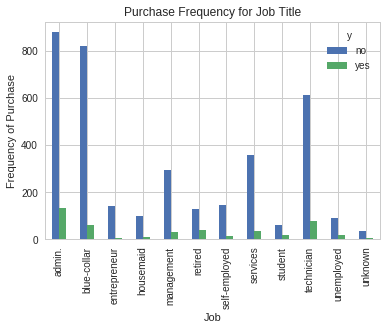

In [0]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

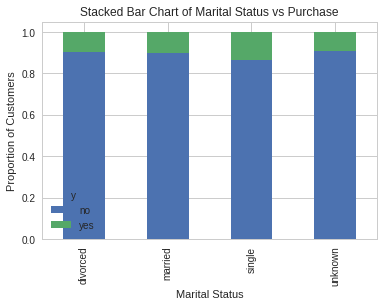

In [0]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

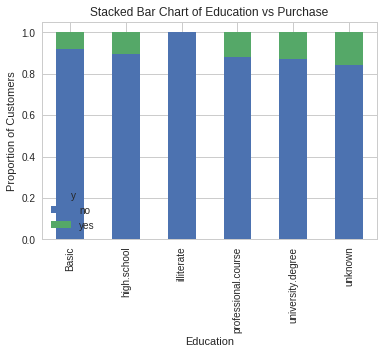

In [0]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

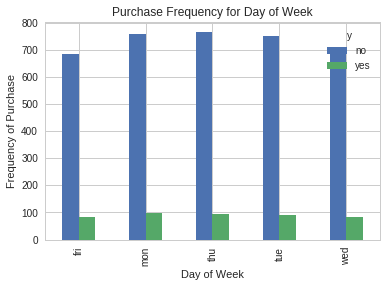

In [0]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

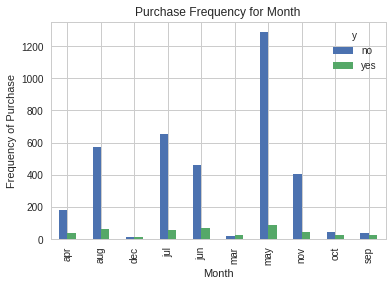

In [0]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

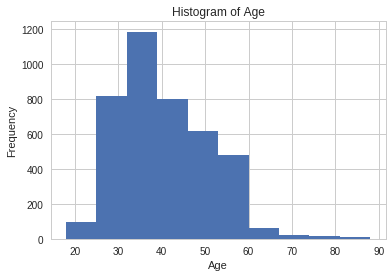

In [0]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

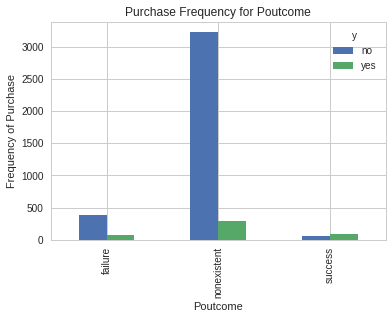

In [0]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [0]:
data=pd.get_dummies(data,prefix=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'],columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome'])
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [0]:
print(list(data.columns))

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutco

In [0]:
print(data.shape)

(4119, 62)


In [0]:
X1 = data.loc[:, data.columns != 'y']
y1 = data.loc[:, data.columns == 'y']
data_final_vars=data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(X1, y1.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
print(data.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[False False False False  True False False False  True False False  True
  True False  True False  True  True False False False False False False
 False False False False False False False  True False False False False
  True False False  True False False  True False False  True  True  True
  True  True False  True False False False False False False  True  True
  True]
[27 32 10 36  1  6 19 17  1 31 14  1  1 29  1 33  1  1 22 25  4 39 11 34
 23 42 18  5 40 13 24  1 28 26 41 12  1  2  7  1 15  8  1 37 16  1  1  1
  1  1  9  1 38 30 20 35 21  3  1  1  1]
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
col_to_use = ['previous','euribor3m','job_blue-collar','job_management', 'job_retired','marital_single','education_high.school', 'education_unknown', 'default_no','housing_yes',
              'loan_unknown','contact_telephone', 'month_apr', 'month_aug','month_jun', 'month_mar', 'month_may','poutcome_success', 'poutcome_failure']
       

In [0]:
data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

Class 0: 3668
Class 1: 451
Proportion: 8.13 : 1


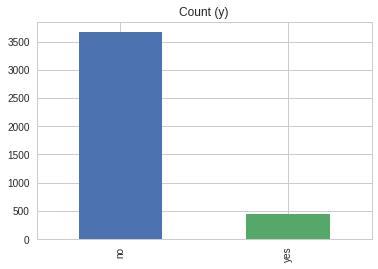

In [0]:
y_count = data.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[0] / y_count[1], 2), ': 1')

y_count.plot(kind='bar', title='Count (y)');

In [0]:
# Class count
count_class_0, count_class_1 = data.y.value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

Random over-sampling:
yes    3668
no     3668
Name: y, dtype: int64


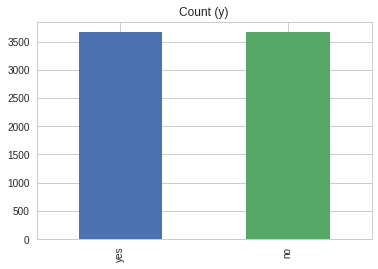

In [0]:
data_class_1_over = data_class_1.sample(count_class_0,replace=True)
data = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data.y.value_counts())

data.y.value_counts().plot(kind='bar', title='Count (y)');

Class 0: 3668
Class 1: 3668
Proportion: 1.0 : 1


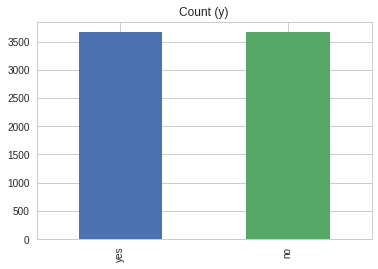

In [0]:
y_count = data.y.value_counts()
print('Class 0:', y_count[0])
print('Class 1:', y_count[1])
print('Proportion:', round(y_count[0] / y_count[1], 2), ': 1')

y_count.plot(kind='bar', title='Count (y)');

In [0]:
data['pdays']=np.where(data['pdays'] ==999, -1, data['pdays'])

In [0]:
#col_to_use=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']
X=data[col_to_use]
y=data.y

In [0]:
#data['y']=np.where(data['y'] =='yes', 1, data['y'])
#data['y']=np.where(data['y'] =='no', 0, data['y'])

In [0]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline


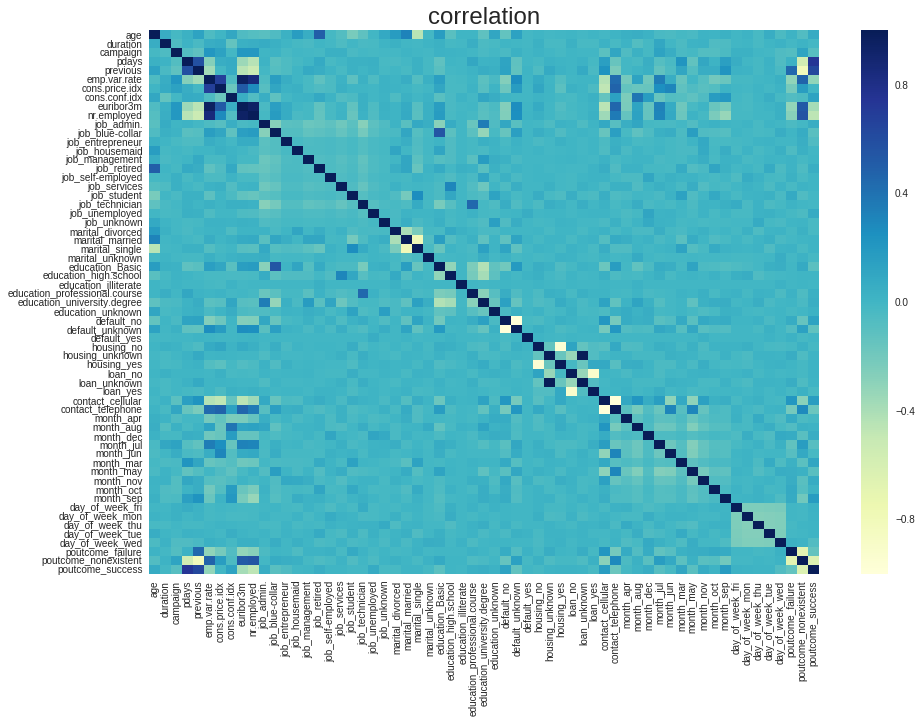

In [0]:
df_corr = data.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying 
seaborn.set(font_scale=2,style='white')

plt.title('correlation')
plt.show()



In [0]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [0]:
correlation = data.corr()
correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,0.056129,-0.023350,0.037106,0.125824,-0.051559,0.002972,0.094102,-0.057750,-0.082466,...,0.015460,0.035792,-0.006728,0.018171,-0.029911,0.061978,-0.044288,0.017257,-0.066310,0.071635
duration,0.056129,1.000000,-0.052844,0.021582,-0.034406,0.061861,0.073096,-0.139016,0.044145,0.049281,...,-0.059448,-0.050134,-0.007023,0.001023,-0.024364,0.003876,0.027174,-0.015611,0.018697,-0.008832
campaign,-0.023350,-0.052844,1.000000,-0.074872,-0.117444,0.209547,0.134532,-0.012091,0.200416,0.197565,...,-0.075623,-0.046018,0.039047,0.037536,-0.004539,-0.014409,-0.057832,-0.070980,0.121985,-0.090274
pdays,0.037106,0.021582,-0.074872,1.000000,0.582230,-0.265695,0.054749,0.076563,-0.344705,-0.437711,...,0.016737,0.153439,0.056943,-0.004805,-0.016825,0.024829,-0.058644,0.028118,-0.569302,0.742017
previous,0.125824,-0.034406,-0.117444,0.582230,1.000000,-0.371056,-0.014667,0.065316,-0.453112,-0.530429,...,0.055675,0.231426,0.027332,0.017248,-0.022681,0.016799,-0.038237,0.445831,-0.809553,0.625791
emp.var.rate,-0.051559,0.061861,0.209547,-0.265695,-0.371056,1.000000,0.685363,-0.054572,0.955352,0.855806,...,-0.202098,-0.160769,-0.023028,-0.016815,-0.003832,0.000782,0.043198,-0.305264,0.473971,-0.319577
cons.price.idx,0.002972,0.073096,0.134532,0.054749,-0.014667,0.685363,1.000000,-0.167884,0.517988,0.278493,...,-0.077600,0.022861,-0.006312,-0.007995,0.012289,-0.014211,0.016188,-0.213986,0.167082,-0.000116
cons.conf.idx,0.094102,-0.139016,-0.012091,0.076563,0.065316,-0.054572,-0.167884,1.000000,0.048368,-0.064868,...,0.177155,0.198670,-0.009824,-0.029991,0.006765,0.051017,-0.018218,-0.064078,-0.045553,0.129544
euribor3m,-0.057750,0.044145,0.200416,-0.344705,-0.453112,0.955352,0.517988,0.048368,1.000000,0.940055,...,-0.160058,-0.218899,-0.020965,-0.024178,-0.007564,0.008435,0.044898,-0.313556,0.526534,-0.382061
nr.employed,-0.082466,0.049281,0.197565,-0.437711,-0.530429,0.855806,0.278493,-0.064868,0.940055,1.000000,...,-0.228833,-0.330718,-0.017366,-0.021416,-0.003442,-0.001259,0.044094,-0.274357,0.556325,-0.463916


In [0]:
#end_preprocessing

In [0]:
#Test train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [0]:
print(X_train.shape)

(5868, 19)


In [0]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
#Applying PCA here
from sklearn.decomposition import PCA
pca = PCA(n_components= 15) #We will set it none so that we can see the variance explained and then choose no of comp.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
print(X_train.shape)

(5868, 15)


In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.13986365, 0.08160923, 0.07081138, 0.06773836, 0.06318572,
       0.06075978, 0.05945187, 0.05709831, 0.05566881, 0.0523226 ,
       0.04896031, 0.04643034, 0.04329347, 0.03997356, 0.03402974])

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
#logistic regression 

In [0]:
# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Predict the test set values
y_pred = classifier.predict(X_test)


In [0]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[613, 105],
       [283, 467]])

In [0]:
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("the sensitivity or recall is : "+str((cm[0][0]) / (cm[0][1]+cm[0][0])))
print("the specificity  is : "+str((cm[1][1]) / (cm[1][0]+cm[1][1])))
print("the precision is : "+str((cm[0][0]) / (cm[0][0]+cm[1][0])))

the accuracy is : 0.7356948228882834
the sensitivity or recall is : 0.8537604456824512
the specificity  is : 0.6226666666666667
the precision is : 0.6841517857142857


In [0]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test)
comparison['y_predicted'] = y_pred
comparison.head(5)

,y,y_predicted
3018,no,no
3108,no,no
2185,no,no
1423,no,no
1791,no,no


In [0]:
#LogisticRegression with PCA

In [0]:
pca = PCA(n_components= 15) # here you can change this number to play around
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [0]:
# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Predict the test set values
y_pred = classifier.predict(X_test)


In [0]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[592, 126],
       [275, 475]])

In [0]:
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("the sensitivity or recall is : "+str((cm[0][0]) / (cm[0][1]+cm[0][0])))
print("the specificity  is : "+str((cm[1][1]) / (cm[1][0]+cm[1][1])))
print("the precision is : "+str((cm[0][0]) / (cm[0][0]+cm[1][0])))

the accuracy is : 0.7268392370572208
the sensitivity or recall is : 0.8245125348189415
the specificity  is : 0.6333333333333333
the precision is : 0.6828143021914648


In [0]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test)
comparison['y_predicted'] = y_pred
comparison.head(5)

,y,y_predicted
3018,no,no
3108,no,no
2185,no,yes
1423,no,no
1791,no,no


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
#svm

In [0]:
#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,y_train)



SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.12, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-05, verbose=False)

In [0]:
#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test)



In [0]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[606, 147],
       [147, 568]])

In [0]:
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("the sensitivity or recall is : "+str((cm[0][0]) / (cm[0][1]+cm[0][0])))
print("the specificity  is : "+str((cm[1][1]) / (cm[1][0]+cm[1][1])))
print("the precision is : "+str((cm[0][0]) / (cm[0][0]+cm[1][0])))

the accuracy is : 0.7997275204359673
the sensitivity or recall is : 0.8047808764940239
the specificity  is : 0.7944055944055944
the precision is : 0.8047808764940239


In [0]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test)
comparison['y_predicted'] = y_pred
comparison.head(5)

,y,y_predicted
3086,yes,yes
2455,yes,yes
2351,no,no
3944,yes,no
639,yes,no


In [0]:
#svm with PCA

In [0]:
print(X_train.shape)

(5868, 19)


In [0]:
#pca = PCA(n_components= 15) # here you can change this number to play around
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [0]:
print(X_train.shape)

(5868, 19)


In [0]:
#Create classifier object
from sklearn.svm import SVC
classifier_svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
classifier_svm_kernel.fit(X_train,y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.12, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=1e-05, verbose=False)

In [0]:
#Predict the result for test values
y_pred = classifier_svm_kernel.predict(X_test)

In [0]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[606, 147],
       [147, 568]])

In [0]:
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))
print("the sensitivity or recall is : "+str((cm[0][0]) / (cm[0][1]+cm[0][0])))
print("the specificity  is : "+str((cm[1][1]) / (cm[1][0]+cm[1][1])))
print("the precision is : "+str((cm[0][0]) / (cm[0][0]+cm[1][0])))

the accuracy is : 0.7997275204359673
the sensitivity or recall is : 0.8047808764940239
the specificity  is : 0.7944055944055944
the precision is : 0.8047808764940239


In [0]:
precision=(cm[0][0]) / (cm[0][0]+cm[1][0])
recall=(cm[0][0]) / (cm[0][1]+cm[0][0])
F1 = 2 * (precision * recall) / (precision + recall)
print("f1 score = "+str(F1))

f1 score = 0.8047808764940239


In [0]:
#Comparing the predictions with the actual results
comparison = pd.DataFrame(y_test)
comparison['y_predicted'] = y_pred
comparison.head(5)

,y,y_predicted
3086,yes,yes
2455,yes,yes
2351,no,no
3944,yes,no
639,yes,no
